# Dados e Visualizações

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
notas = pd.read_csv('./ml-latest-small/ratings.csv')

notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
notas.shape

(100836, 4)

In [4]:
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [6]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [7]:
notas['nota'].mean()

3.501556983616962

Existe a opção de fazer esse formato:
```
dataframe.coluna

<Axes: >

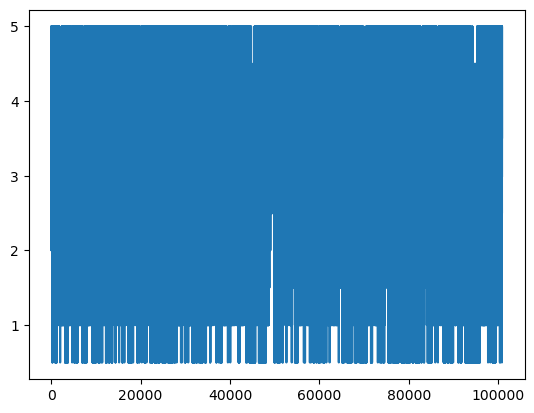

In [8]:
notas.nota.plot()

<Axes: ylabel='Frequency'>

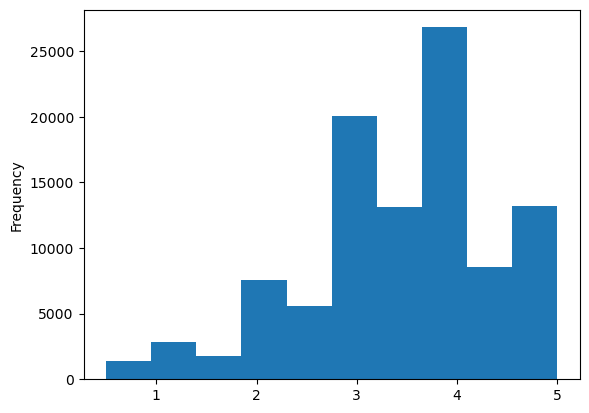

In [9]:
notas.nota.plot(kind = 'hist')

In [10]:
print('Media', notas.nota.mean())
print('Mediana', notas.nota.median())

Media 3.501556983616962
Mediana 3.5


In [11]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

<Axes: >

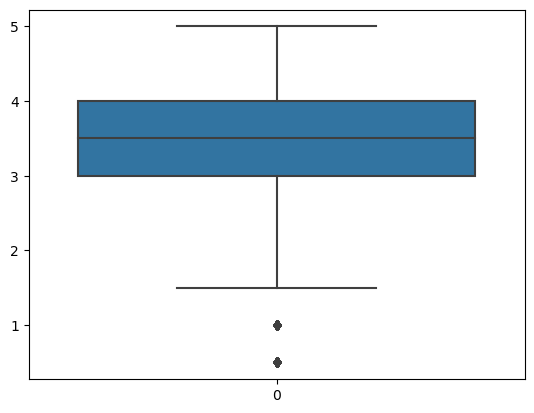

In [12]:
sns.boxplot(notas.nota)

# Análise exploratória

In [13]:
filmes = pd.read_csv('./ml-latest-small/movies.csv')
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [14]:
filmes.columns = ['filmeId', 'titulo', 'generos']

In [15]:
# notas[notas.filmeId == 1].nota # também funciona igual
notas.query('filmeId == 1').nota

0        4.0
516      4.0
874      4.5
1434     2.5
1667     4.5
        ... 
97364    2.5
98479    4.0
98666    2.5
99497    3.0
99534    5.0
Name: nota, Length: 215, dtype: float64

In [16]:
notas.query('filmeId == 1').nota.mean()

3.9209302325581397

In [17]:
notas.query('filmeId == 2').nota.mean()

3.4318181818181817

In [18]:
medias_por_filme = notas.groupby('filmeId').mean()['nota']

In [19]:
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<Axes: ylabel='Frequency'>

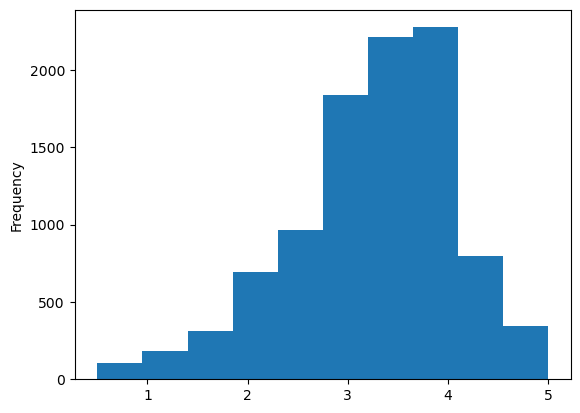

In [20]:
medias_por_filme.plot(kind = 'hist')

In [21]:
medias_por_filme = medias_por_filme.reset_index(drop = True)
medias_por_filme

0       3.920930
1       3.431818
2       3.259615
3       2.357143
4       3.071429
          ...   
9719    4.000000
9720    3.500000
9721    3.500000
9722    3.500000
9723    4.000000
Name: nota, Length: 9724, dtype: float64

<Axes: xlabel='nota'>

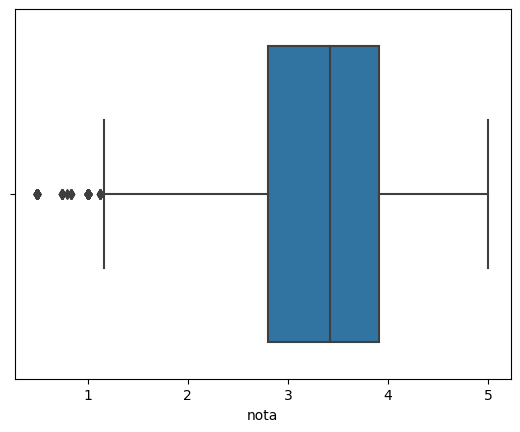

In [22]:
sns.boxplot(x = medias_por_filme)

In [23]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

/tmp/ipykernel_37917/1888804913.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medias_por_filme, bins = 10)


<Axes: xlabel='nota', ylabel='Density'>

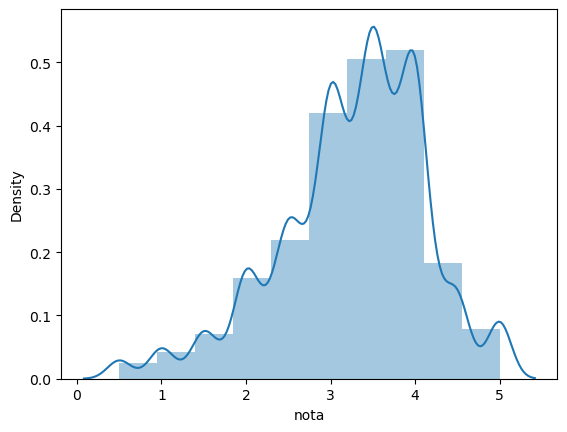

In [24]:
sns.distplot(medias_por_filme, bins = 10)

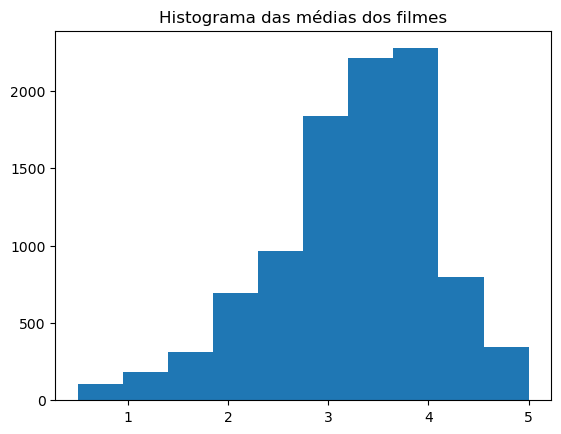

In [25]:
plt.hist(medias_por_filme)
plt.title('Histograma das médias dos filmes')
plt.show()

<Axes: >

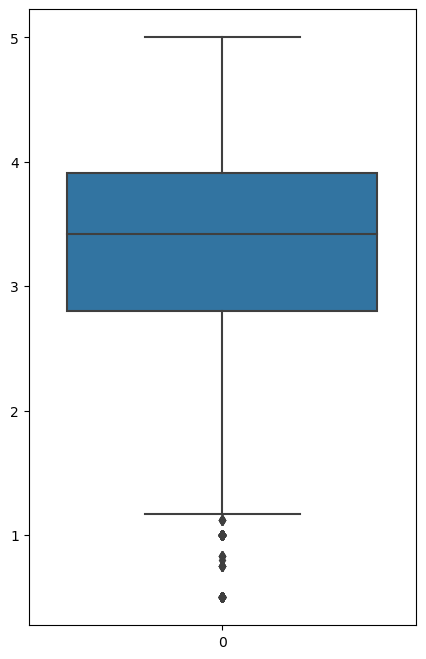

In [26]:
plt.figure(figsize = (5,8))
sns.boxplot(medias_por_filme)

# Variáveis

In [27]:
tmdb = pd.read_csv('./tmdb/tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [28]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [29]:
tmdb.vote_average.unique()

array([ 7.2,  6.9,  6.3,  7.6,  6.1,  5.9,  7.4,  7.3,  5.7,  5.4,  7. ,
        6.5,  6.4,  6.2,  7.1,  5.8,  6.6,  7.5,  5.5,  6.7,  6.8,  6. ,
        5.1,  7.8,  5.6,  5.2,  8.2,  7.7,  5.3,  8. ,  4.8,  4.9,  7.9,
        8.1,  4.7,  5. ,  4.2,  4.4,  4.1,  3.7,  3.6,  3. ,  3.9,  4.3,
        4.5,  3.4,  4.6,  8.3,  3.5,  4. ,  2.3,  3.2,  0. ,  3.8,  2.9,
        8.5,  1.9,  3.1,  3.3,  2.2,  0.5,  9.3,  8.4,  2.7, 10. ,  1. ,
        2. ,  2.8,  9.5,  2.6,  2.4])

Tipos de variáveis:

Categóricas nominais

Categóricas ordinais

Quantitativas contínuas

Quantitativas intervalares (discretas)

# Data visualization

In [30]:
tmdb['original_language'].value_counts().index

# vamos usar assim porque aqui os nomes nas colunas são mais complicados

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'nl', 'fa', 'th', 'he', 'ta', 'cs', 'ro', 'id', 'ar', 'vi',
       'sl', 'ps', 'no', 'ky', 'hu', 'pl', 'af', 'nb', 'tr', 'is', 'xx', 'te',
       'el'],
      dtype='object')

In [31]:
tmdb['original_language'].value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

In [32]:
tmdb['original_language'].value_counts().to_frame() # o índice não é coluna

,original_language
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12
ru,11


In [33]:
contagem_de_linguas = tmdb['original_language'].value_counts().to_frame().reset_index() # o índice agora é uma coluna
contagem_de_linguas.columns = ['original_language', 'total']
contagem_de_linguas.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<Axes: xlabel='original_language', ylabel='total'>

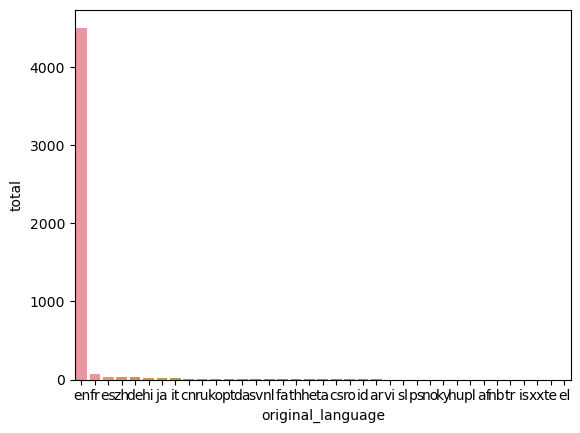

In [34]:
sns.barplot(data = contagem_de_linguas, x = 'original_language', y = 'total')

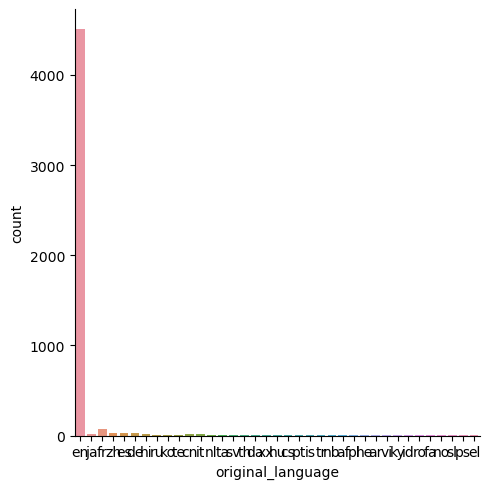

In [35]:
sns.catplot(data = tmdb, x = 'original_language', kind = 'count')

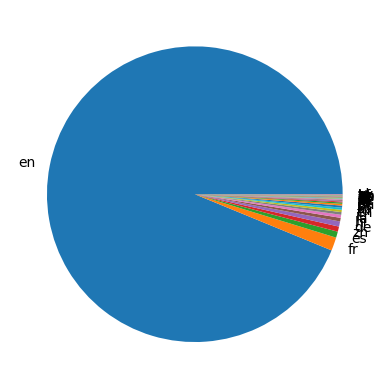

In [36]:
plt.pie(contagem_de_linguas['total'], labels = contagem_de_linguas['original_language'])
plt.show()

In [37]:
total_por_lingua = tmdb['original_language'].value_counts()
total_geral = total_por_lingua.sum()
total_ingles = total_por_lingua.loc['en']
total_resto = total_geral - total_ingles
print(total_ingles, total_resto)

4505 298


In [38]:
dados = {'lingua': ['ingles', 'outros'],
         'total': [total_ingles, total_resto]}
dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


<Axes: xlabel='lingua', ylabel='total'>

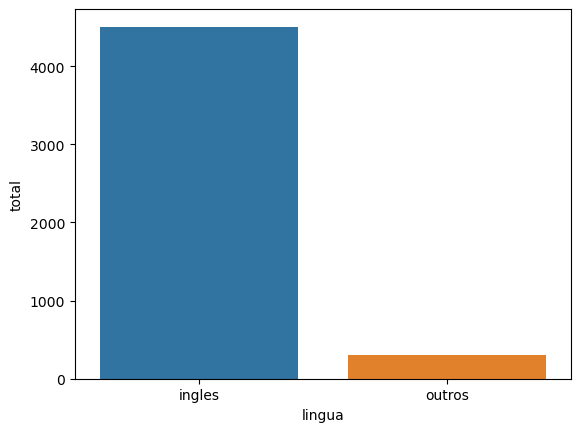

In [39]:
sns.barplot(data = dados, x = 'lingua', y = 'total')

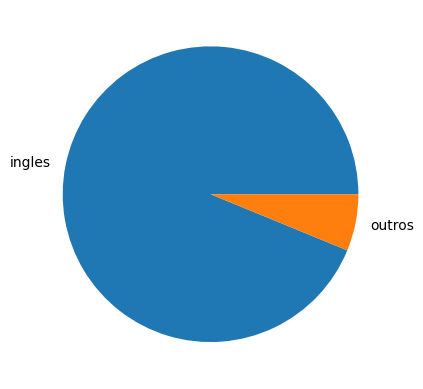

In [40]:
plt.pie(dados['total'], labels = dados['lingua'])
plt.show()

In [41]:
total_lingua_outros = tmdb.query('original_language != "en"').original_language.value_counts()

total_lingua_outros

fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ro     2
id     2
ar     2
cs     2
ta     2
tr     1
nb     1
af     1
pl     1
is     1
hu     1
vi     1
ky     1
xx     1
te     1
no     1
sl     1
ps     1
el     1
Name: original_language, dtype: int64

In [42]:
filmes_nao_ingles = tmdb.query('original_language != "en"')

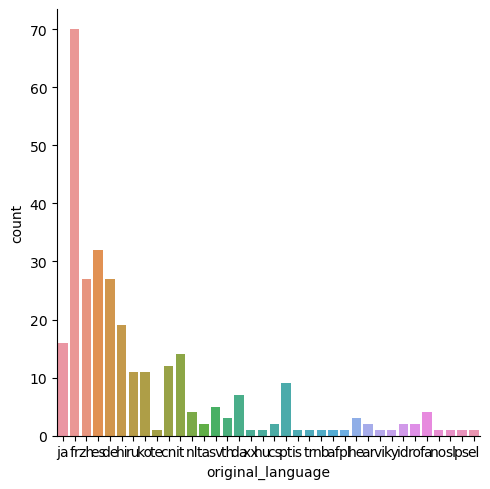

In [43]:
sns.catplot(data = filmes_nao_ingles, x = 'original_language', kind = 'count')

# Melhorando a visualização

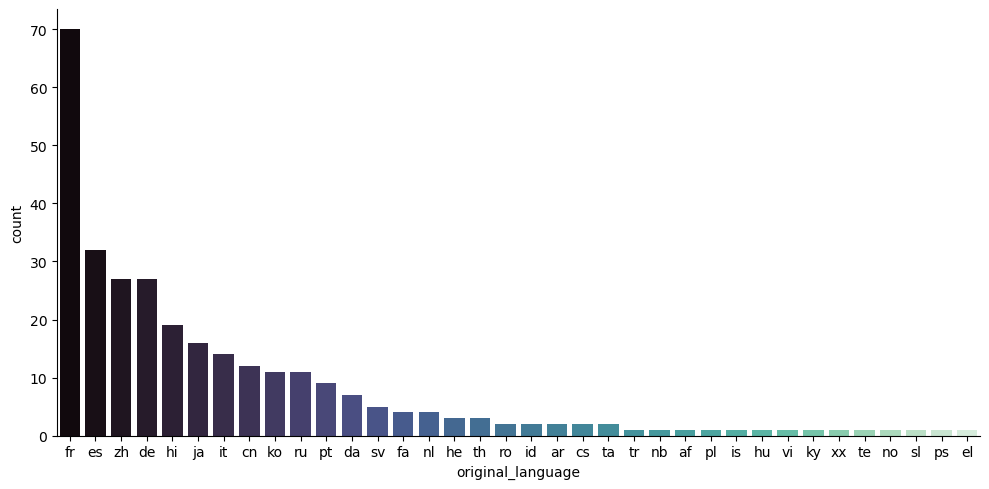

In [44]:
sns.catplot(data = filmes_nao_ingles, 
            x = 'original_language', 
            kind = 'count',
            aspect = 2,
            order = total_lingua_outros.index,
            palette = 'mako')

# Dados e estatística

In [45]:
filmes.head(2)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [46]:
notas_toy_story = notas.query('filmeId == 1')
notas_jumanji = notas.query('filmeId == 2')

print(len(notas_toy_story))
print(len(notas_jumanji))


215
110


In [47]:
print('Nota média de Toy Story %.2f' % notas_toy_story.nota.mean())
print('Nota média de Jumanji %.2f' % notas_jumanji.nota.mean())

Nota média de Toy Story 3.92
Nota média de Jumanji 3.43


In [48]:
print('Nota mediana de Toy Story %.2f' % notas_toy_story.nota.median())
print('Nota mediana de Jumanji %.2f' % notas_jumanji.nota.median())

Nota mediana de Toy Story 4.00
Nota mediana de Jumanji 3.50


In [59]:
print('Desvio padrão de Toy Story %.2f' % notas_toy_story.nota.std())
print('Desvio padrão de Jumanji %.2f' % notas_jumanji.nota.std())

Desvio padrão de Toy Story 0.83
Desvio padrão de Jumanji 0.88


In [49]:
filme1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))
filme2 = np.append(np.array([5] * 10), np.array([1] * 10))

In [60]:
print(filme1.mean(), filme2.mean())
print(np.std(filme1), np.std(filme2))
print(np.median(filme1), np.median(filme2))


3.0 3.0
0.5 2.0
3.0 3.0


/tmp/ipykernel_37917/420085649.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(filme1)
/tmp/ipykernel_37917/420085649.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(filme2)


<Axes: ylabel='Density'>

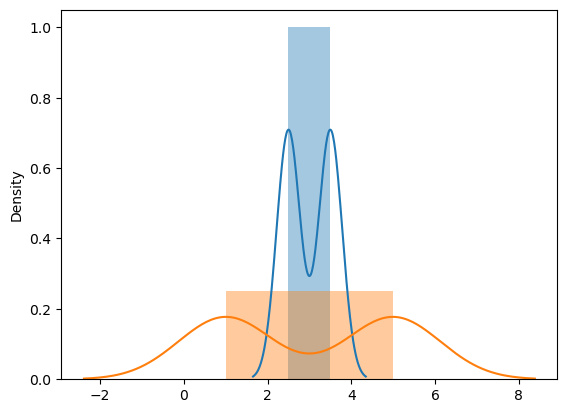

In [51]:
sns.distplot(filme1)
sns.distplot(filme2)

(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

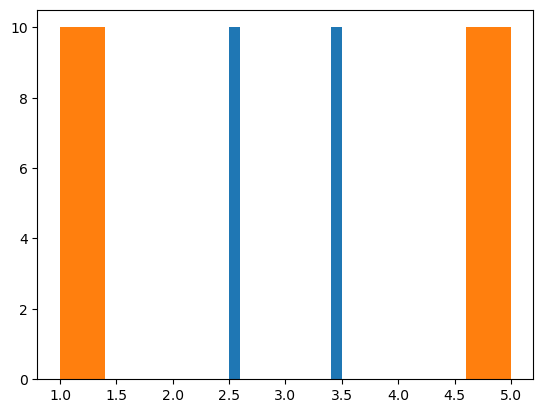

In [52]:
plt.hist(filme1)
plt.hist(filme2)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f92a37f3640>,
 'caps': [<matplotlib.lines.Line2D at 0x7f92a37f3b80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f92a37f33a0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f92a3801100>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f92a38013a0>,
 'means': []}

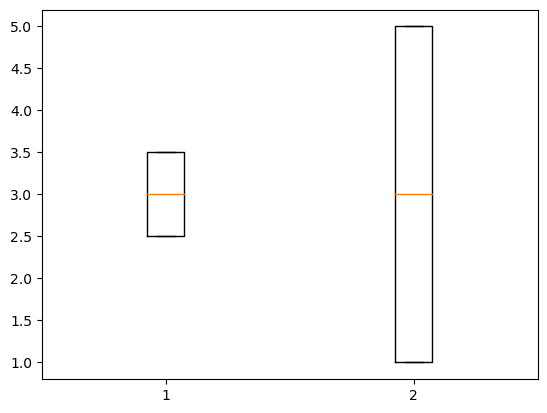

In [53]:
plt.boxplot([filme1, filme2])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f92a377db80>,
 'caps': [<matplotlib.lines.Line2D at 0x7f92a378c100>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f92a377d8e0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f92a379b610>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f92a378c580>,
 'means': []}

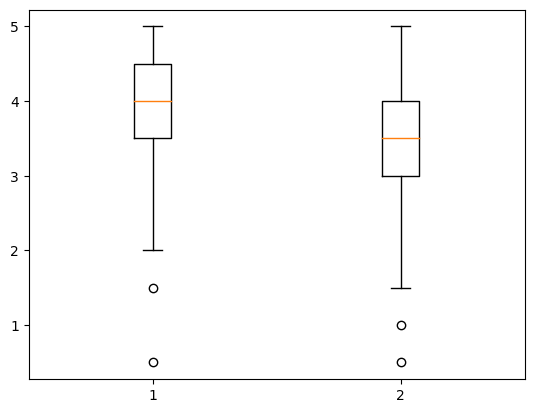

In [54]:
plt.boxplot([notas_toy_story.nota, notas_jumanji.nota])

<Axes: xlabel='filmeId', ylabel='nota'>

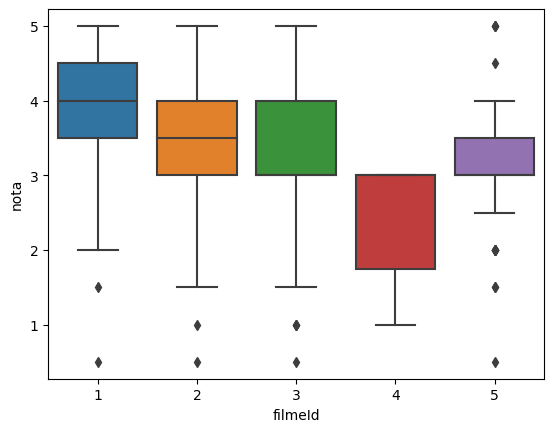

In [56]:
sns.boxplot(data = notas.query('filmeId in [1,2,3,4,5]'), x = 'filmeId', y = 'nota')